In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers,losses,metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(train_data,train_labels),(test_data,test_labels) = keras.datasets.imdb.load_data(num_words=10000)

In [9]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')

In [16]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [19]:
y_test = np.asarray(test_labels).astype('float32')

In [20]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [21]:
model = models.Sequential()
model.add(layers.Dense(16,activation=tf.nn.relu,input_shape=(10000,)))
model.add(layers.Dense(16,activation=tf.nn.relu))
model.add(layers.Dense(1,activation=tf.nn.sigmoid))

In [33]:
model.compile(optimizer = optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [34]:
history = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 246us/sample - loss: 0.0016 - binary_accuracy: 0.9995 - val_loss: 1.3816 - val_binary_accuracy: 0.8612
Epoch 2/20
20000/20000 [==============================] - 3s 150us/sample - loss: 3.7952e-05 - binary_accuracy: 1.0000 - val_loss: 1.3965 - val_binary_accuracy: 0.8606
Epoch 3/20
20000/20000 [==============================] - 2s 99us/sample - loss: 2.8787e-05 - binary_accuracy: 1.0000 - val_loss: 1.4507 - val_binary_accuracy: 0.8590
Epoch 4/20
20000/20000 [==============================] - 2s 97us/sample - loss: 0.0016 - binary_accuracy: 0.9994 - val_loss: 1.4802 - val_binary_accuracy: 0.8606
Epoch 5/20
20000/20000 [==============================] - 2s 105us/sample - loss: 1.6159e-05 - binary_accuracy: 1.0000 - val_loss: 1.4930 - val_binary_accuracy: 0.8596
Epoch 6/20
20000/20000 [==============================] - 2s 101us/sample - loss: 1.3829e-05 - binary_accuracy: 1.0000 - 

In [35]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [36]:
acc = history.history['binary_accuracy']
loss = history.history['loss']

val_loss = history.history['val_binary_accuracy']
val_acc = history.history['val_loss']

epochs = range(1,21)

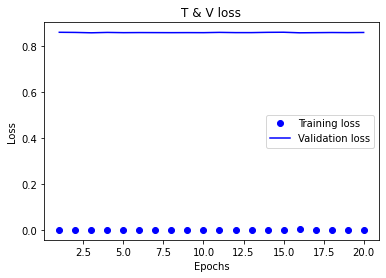

In [37]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')

plt.title('T & V loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 162us/sample - loss: 0.4448 - accuracy: 0.8244
Epoch 2/4
25000/25000 [==============================] - 3s 100us/sample - loss: 0.2501 - accuracy: 0.9102
Epoch 3/4
25000/25000 [==============================] - 2s 84us/sample - loss: 0.1967 - accuracy: 0.9294
Epoch 4/4
25000/25000 [==============================] - 4s 173us/sample - loss: 0.3360 - accuracy: 0.8687


In [39]:
model.predict(x_test)

array([[0.12394314],
       [0.9995852 ],
       [0.46910012],
       ...,
       [0.07485614],
       [0.03734163],
       [0.37685037]], dtype=float32)

In [41]:
model.evaluate(x_test,)

   32/25000 [..............................] - ETA: 34s

IndexError: list index out of range